In [2]:
# %load ~/.ipython/standard_imports.py
import os
import sys
import logging
import itertools
import functools

logging.basicConfig(level=logging.INFO)
import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing

import isajosep_util
import isajosep_util.data_frame_plotter


Ultimately, our goal is to build a ML model that predicts the Diagnosis (DX), based on symptoms and other factors. In the project you can demonstrate doing some or all of the following:
- **Perform exploratory analysis and visualization of data  (this sheet)**
- Build one or more ML models on the data
- Select the best model, and report its performance and error analysis
- Perform feature selection to find most salient features
- Explore ways to deal with unbalanced data
- Try using external ML classifies (e.g. IBM Watson)
etc, etc

In [3]:
formatted_data = pd.read_pickle('/Users/ijoseph/Code/Data/Gyant/final_formatting_all_obs.pkl')

In [4]:
formatted_data.shape

(21222, 2258)

#  Random Peeks

In [5]:
isajosep_util.double_sample_df(formatted_data, row_dims=5, col_dims=5)

,,,s_0133__checked_and_present_and_absent,s_2298__checked_and_present,s_0737__checked_and_absent,s_0324__checked_and_present,s_0335__not_checked
AGE,MONTH,SEX,,,,,
5.0,3,1,0,0,0,0,1
86.0,6,0,0,0,0,0,1
47.0,8,0,0,0,0,0,1
17.0,1,0,0,0,0,0,1
45.0,6,1,0,0,0,0,1


Seems pretty sparse. Symptoms are widely disparate in terms of priors. 

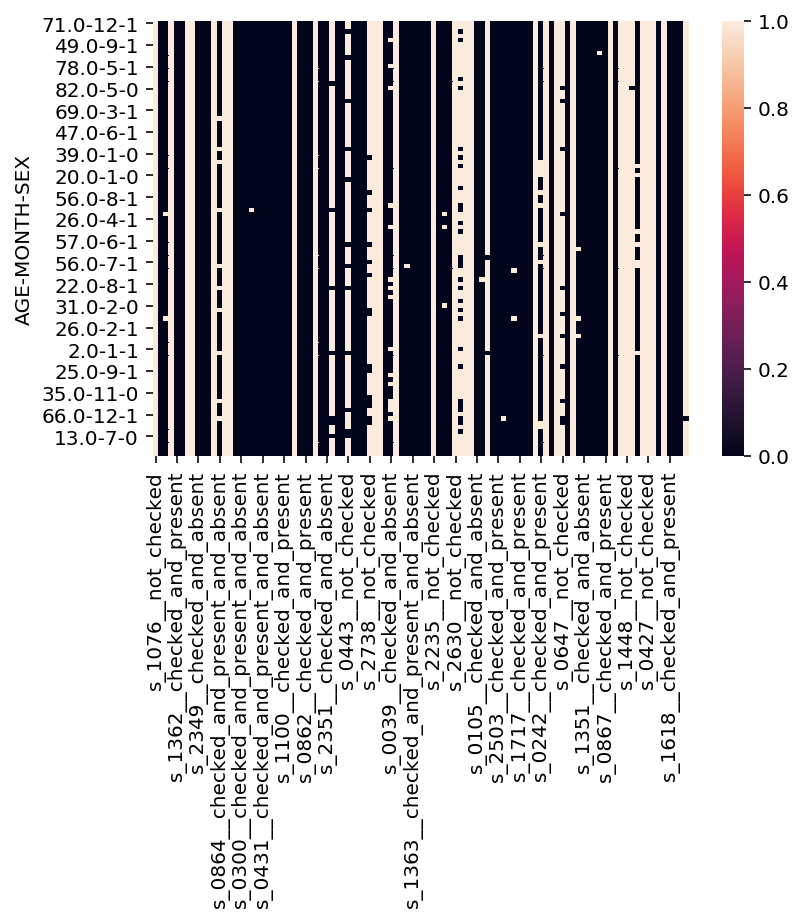

In [6]:
sns.heatmap(isajosep_util.double_sample_df(formatted_data.drop('DX', axis=1), row_dims=100, col_dims=100))

# Labels

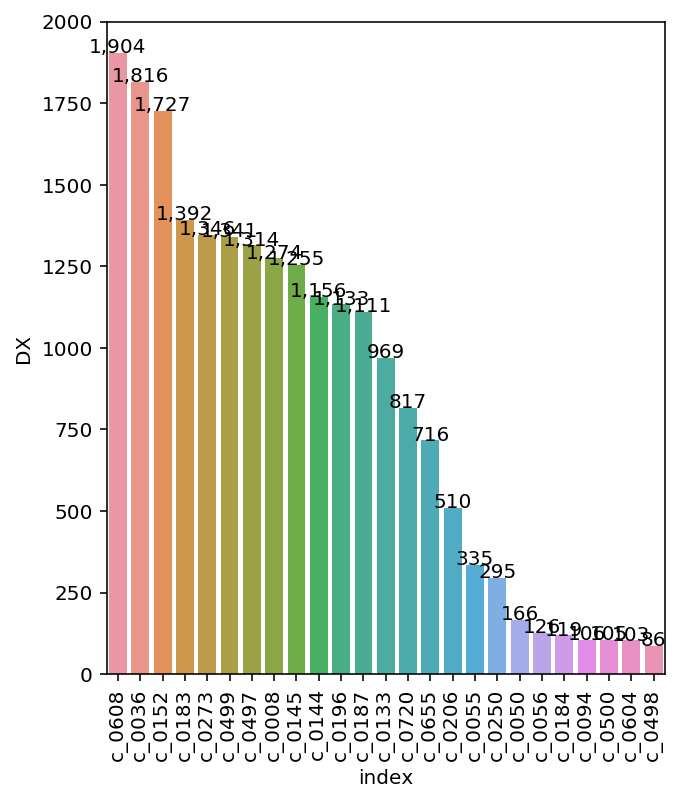

In [7]:
isajosep_util.labeled_barplot(pd.DataFrame(formatted_data.DX.value_counts()).reset_index(), x_label='index', y_label='DX')

Okay could be worse. Even the smallest class has about 86-ish observations.

# Dimensionality Reduction

## Non-Normed

In [8]:
le = sklearn.preprocessing.LabelEncoder()
le_fit = le.fit(formatted_data.DX)

In [9]:
pca_obj = sklearn.decomposition.PCA(n_components=2)
pc_fit = pca_obj.fit(formatted_data.drop('DX', axis=1))
pcs = pca_obj.transform(formatted_data.drop('DX', axis=1))
pcs_df = pd.DataFrame(pcs, columns=['pc1', 'pc2'], index=formatted_data.index)
pcs_df['DX'] = formatted_data.DX

AttributeError: module 'sklearn' has no attribute 'decomposition'

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(pcs_df.pc1, pcs_df.pc2, c=le_fit.transform(formatted_data.DX), alpha=0.05, cmap=plt.cm.get_cmap('Spectral', 10))
plt.gca().set_xlabel('PC1')
plt.gca().set_ylabel('PC2')
plt.colorbar()

Fascinating. Looks like one of those fighting fishes. Definitely some structure here. Encouraging.

In [ ]:
pc_loading_df = pd.DataFrame(pc_fit.components_.T, index=formatted_data.drop('DX', axis=1).columns, columns=['pc1', 'pc2'])

### A peek at the most representative features for overall variation

In [ ]:
sns.distplot(pc_loading_df.drop('pc2', axis=1).pc1, kde=False, hist_kws={'log':True})

In [ ]:
pc_loading_df.drop('pc2', axis=1).pc1.sort_values().head()

In [ ]:
pc_loading_df.drop('pc2', axis=1).pc1.sort_values().tail()

## Normed

In [ ]:
pca_obj = sklearn.decomposition.PCA(n_components=2, whiten=True)
pc_fit = pca_obj.fit(formatted_data.drop('DX', axis=1))
pcs = pca_obj.transform(formatted_data.drop('DX', axis=1))
pcs_df = pd.DataFrame(pcs, columns=['pc1', 'pc2'], index=formatted_data.index)
pcs_df['DX'] = formatted_data.DX

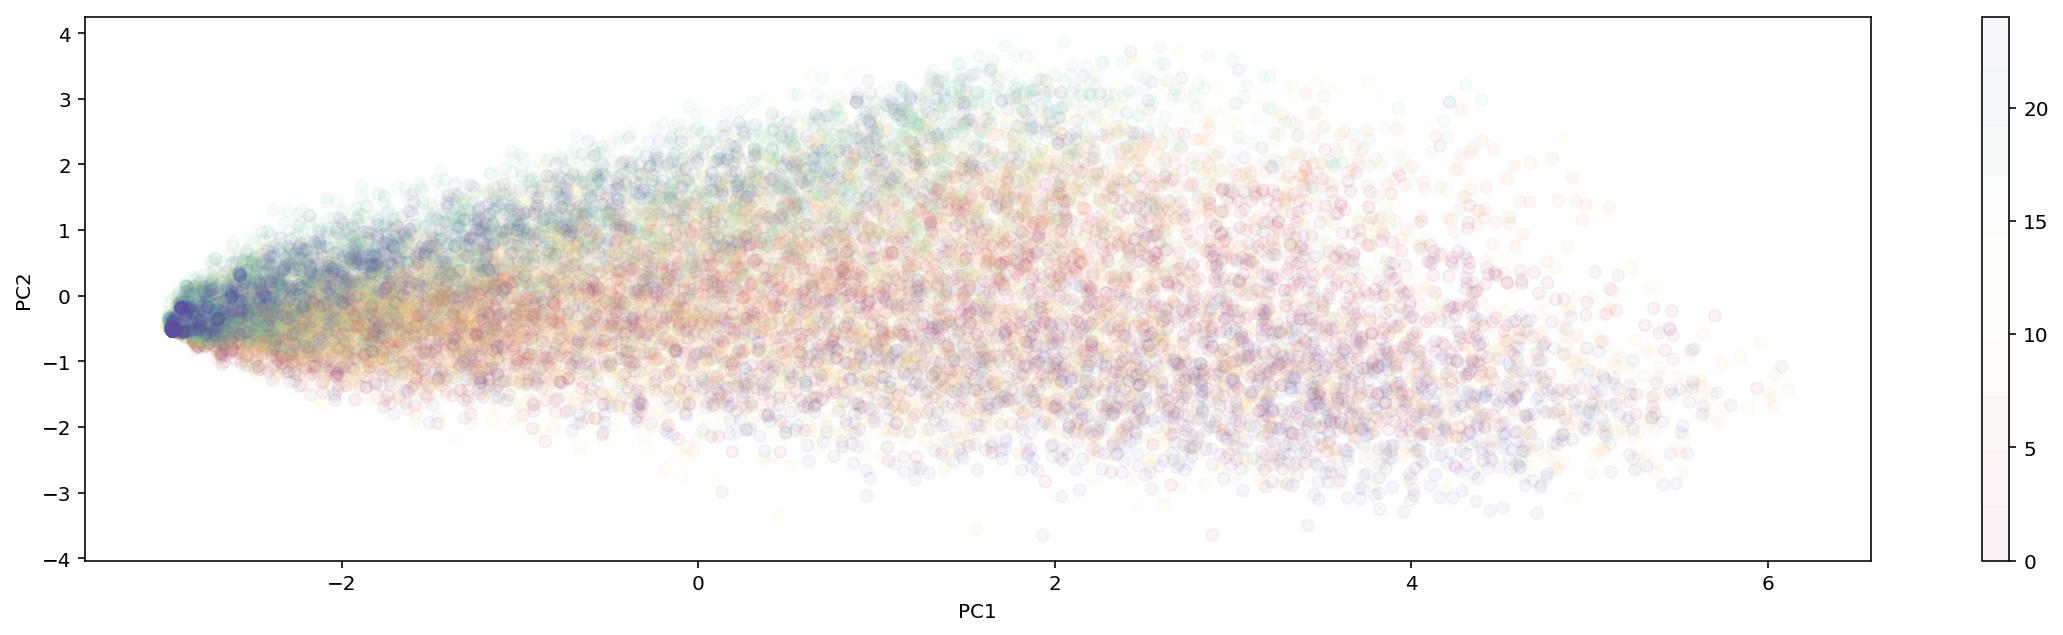

In [55]:
plt.figure(figsize=(20,5))
plt.scatter(pcs_df.pc1, pcs_df.pc2, c=le_fit.transform(formatted_data.DX), alpha=0.05, cmap=plt.cm.get_cmap('Spectral', 10))
plt.gca().set_xlabel('PC1')
plt.gca().set_ylabel('PC2')
plt.colorbar()

Fascinating. Looks like one of those fighting fishes. Definitely some structure here. Encouraging.

In [29]:
pc_loading_df = pd.DataFrame(pc_fit.components_.T, index=formatted_data.drop('DX', axis=1).columns, columns=['pc1', 'pc2'])

### A peek at the most representative features for overall variation

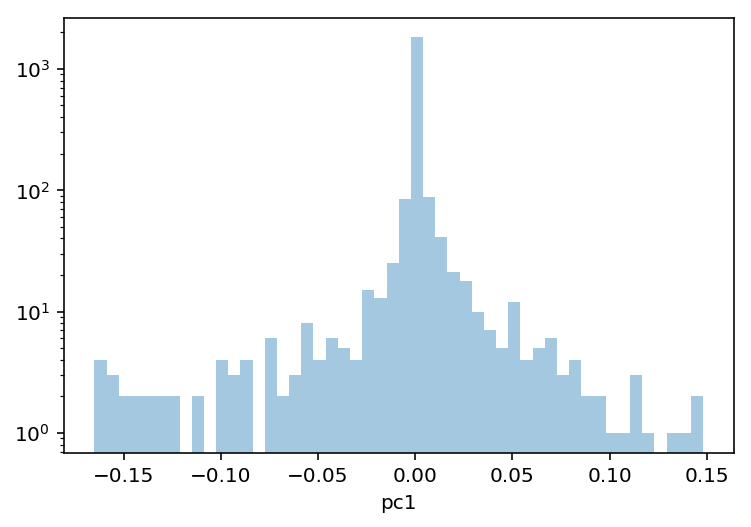

In [45]:
sns.distplot(pc_loading_df.drop('pc2', axis=1).pc1, kde=False, hist_kws={'log':True})

In [39]:
pc_loading_df.drop('pc2', axis=1).pc1.sort_values().head()

s_0070__not_checked   -0.165013
s_0002__not_checked   -0.164909
s_0106__not_checked   -0.162549
s_1266__not_checked   -0.158875
s_0022__not_checked   -0.157449
Name: pc1, dtype: float64

In [40]:
pc_loading_df.drop('pc2', axis=1).pc1.sort_values().tail()

s_1050__checked_and_absent    0.119426
s_0070__checked_and_absent    0.132451
s_0106__checked_and_absent    0.139738
s_0002__checked_and_absent    0.144719
s_0519__checked_and_absent    0.148105
Name: pc1, dtype: float64